In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py

--2025-04-07 06:18:52--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-04-07 06:18:52 (114 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
#Download data from Google Storage (already preformatted)

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data('101_food_classes_10_percent.zip')

train_dir = '101_food_classes_10_percent/train/'
test_dir = '101_food_classes_10_percent/test/'

--2025-04-07 06:41:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.1’

101_food_classes_10 100%[===================>]   1.51G  23.1MB/s    in 71s     

2025-04-07 06:42:44 (21.8 MB/s) - ‘101_food_classes_10_percent.zip.1’ saved [1625420029/1625420029]



In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
batch_size = 32

train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                image_size = IMG_SIZE,
                                                                                label_mode = 'categorical',
                                                                                batch_size = batch_size)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                               image_size = IMG_SIZE,
                                                                               label_mode = 'categorical',
                                                                               shuffle = False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
walk_through_dir('/content/101_food_classes_10_percent')

There are 2 directories and 0 images in '/content/101_food_classes_10_percent'.
There are 101 directories and 0 images in '/content/101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/pulled_pork_sandwich'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/frozen_yogurt'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/ravioli'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/foie_gras'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/miso_soup'.
There are 0 directories and 250 images in 

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
], name = 'data_augmentation')

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
base_model.trainable = False

In [ ]:
input_shape = (224, 224, 3)
inputs = tf.keras.layers.Input(shape =input_shape, name = 'input_layer')
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(len(train_data_all_10_percent.class_names), activation = 'softmax', name = 'output_layer')(x)
model_0 = tf.keras.Model(inputs, outputs)

In [ ]:
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
history_0 = model_0.fit(train_data_all_10_percent,
                        epochs=5,
                        steps_per_epoch = int(len(train_data_all_10_percent)),
                        validation_data = test_data,
                        validation_steps = int((0.25 * len(test_data))))

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 101s 350ms/step - accuracy: 0.1325 - loss: 4.0779 - val_accuracy: 0.3734 - val_loss: 2.7650
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 140s 360ms/step - accuracy: 0.4307 - loss: 2.5872 - val_accuracy: 0.4424 - val_loss: 2.2846
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 119s 263ms/step - accuracy: 0.4786 - loss: 2.1965 - val_accuracy: 0.4753 - val_loss: 2.0645
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 82s 345ms/step - accuracy: 0.5219 - loss: 1.9619 - val_accuracy: 0.4873 - val_loss: 1.9718
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 55s 230ms/step - accuracy: 0.5574 - loss: 1.8021 - val_accuracy: 0.5040 - val_loss: 1.8850


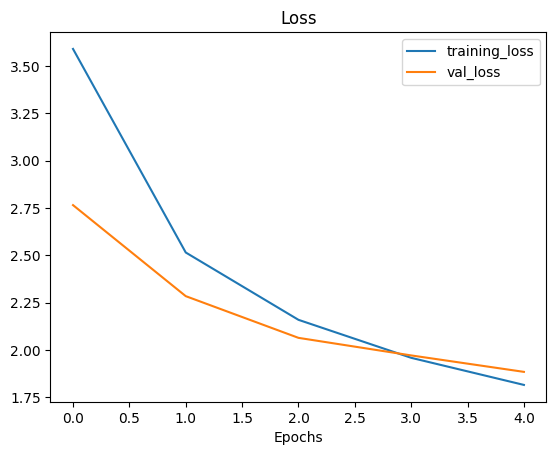

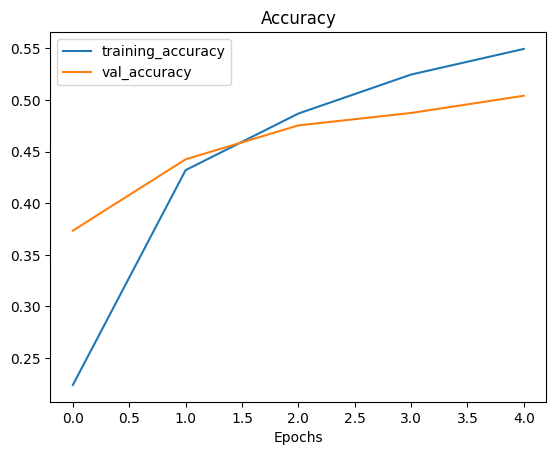

In [ ]:
plot_loss_curves(history_0)

In [ ]:
#Fine-Tuning

In [ ]:
model_0_best_model = model_0.layers[2]

In [ ]:
model_0_best_model.trainable = False

In [ ]:
for layer in (model_0_best_model.layers[-5:]):
  layer.trainable = True

In [ ]:
for layer_number, layer in enumerate(model_0_best_model.layers):
  print(layer_number, '|', layer.name, '|', layer.trainable)

0 | input_layer_6 | False
1 | rescaling_3 | False
2 | normalization_3 | False
3 | stem_conv | False
4 | stem_bn | False
5 | stem_activation | False
6 | block1a_project_conv | False
7 | block1a_project_bn | False
8 | block1a_project_activation | False
9 | block2a_expand_conv | False
10 | block2a_expand_bn | False
11 | block2a_expand_activation | False
12 | block2a_project_conv | False
13 | block2a_project_bn | False
14 | block2b_expand_conv | False
15 | block2b_expand_bn | False
16 | block2b_expand_activation | False
17 | block2b_project_conv | False
18 | block2b_project_bn | False
19 | block2b_drop | False
20 | block2b_add | False
21 | block3a_expand_conv | False
22 | block3a_expand_bn | False
23 | block3a_expand_activation | False
24 | block3a_project_conv | False
25 | block3a_project_bn | False
26 | block3b_expand_conv | False
27 | block3b_expand_bn | False
28 | block3b_expand_activation | False
29 | block3b_project_conv | False
30 | block3b_project_bn | False
31 | block3b_drop | Fal

In [ ]:
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [ ]:
checkpoint_path = "101_classes_10_percent_data_model_checkpoint.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True)

In [ ]:
fine_tune_epochs= 10
history_all_classes_10_percent_fine_tune = model_0.fit(train_data_all_10_percent,
                                                       epochs = fine_tune_epochs,
                                                       steps_per_epoch = int(len(train_data_all_10_percent)),
                                                       validation_data = test_data,
                                                       validation_steps = int((0.25 * len(test_data))),
                                                       initial_epoch = history_0.epoch[-1],
                                                       callbacks = [checkpoint_callback])

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 76s 258ms/step - accuracy: 0.5531 - loss: 1.9601 - val_accuracy: 0.5044 - val_loss: 1.9459
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 52s 218ms/step - accuracy: 0.5994 - loss: 1.7762 - val_accuracy: 0.5149 - val_loss: 1.8600
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 49s 205ms/step - accuracy: 0.6030 - loss: 1.6837 - val_accuracy: 0.5332 - val_loss: 1.7847
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 89s 238ms/step - accuracy: 0.6288 - loss: 1.5969 - val_accuracy: 0.5349 - val_loss: 1.7515
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 49s 206ms/step - accuracy: 0.6213 - loss: 1.5670 - val_accuracy: 0.5433 - val_loss: 1.7308
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 89s 238ms/step - accuracy: 0.6416 - loss: 1.4925 - val_accuracy: 0.5484 - val_loss: 1.6993


In [ ]:
for layer in model_0.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetv2-b0 False
global_average_pooling_layer True
output_layer True


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_6 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dw

In [ ]:
results_all_classes_10_percent_fine_tune = model_0.evaluate(test_data)
results_all_classes_10_percent_fine_tune

790/790 ━━━━━━━━━━━━━━━━━━━━ 54s 68ms/step - accuracy: 0.5772 - loss: 1.6057


[1.487422227859497, 0.603960394859314]

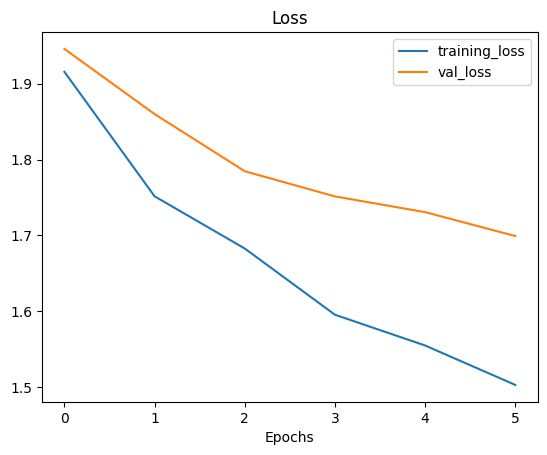

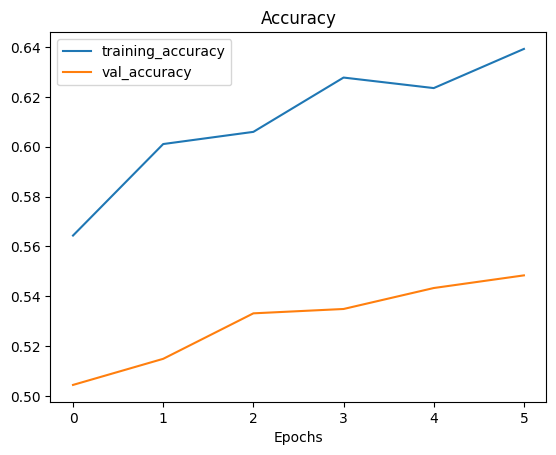

In [ ]:
plot_loss_curves(history_all_classes_10_percent_fine_tune)

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.2240263968706131, 0.4319472014904022, 0.4867326617240906, 0.5244884490966797, 0.5493069291114807, 0.5643564462661743, 0.6010560989379883, 0.605940580368042, 0.6277227997779846, 0.6234983205795288, 0.6392078995704651]


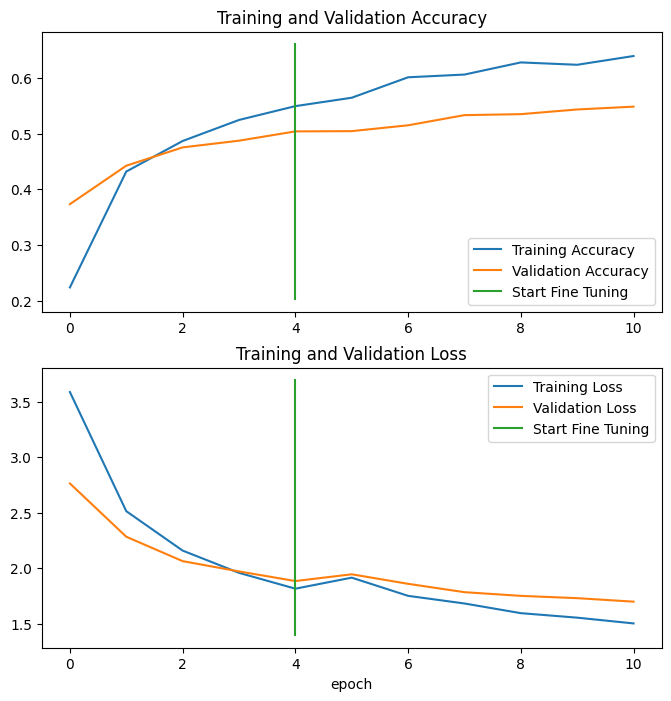

In [ ]:
compare_historys(original_history = history_0,
                 new_history = history_all_classes_10_percent_fine_tune,
                 initial_epochs = 5)

#Error Analysis

In [ ]:
pred_probs = model_0.predict(test_data, verbose = 1)

790/790 ━━━━━━━━━━━━━━━━━━━━ 56s 70ms/step


In [ ]:
len(pred_probs)

25250

In [ ]:
pred_probs.shape

(25250, 101)

In [ ]:
sum(pred_probs[0])

np.float32(0.99999994)

In [ ]:
pred_classes = pred_probs.argmax(axis =1)
pred_classes[:10]

array([85,  0, 28,  0,  8, 78, 29,  0,  9,  0])

In [ ]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

In [ ]:
y_labels[:10]

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

In [ ]:
pred_classes[:10]

array([85,  0, 28,  0,  8, 78, 29,  0,  9,  0])

In [ ]:
from sklearn.metrics import accuracy_score

sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.6039603960396039

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)


  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)


  # ax.xaxis.set_label_position("bottom")
  # ax.xaxis.tick_bottom()


  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)


  threshold = (cm.max() + cm.min()) / 2.


  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)


In [ ]:
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
make_confusion_matrix(y_true = y_labels,
                      y_pred = pred_classes,
                      classes = class_names,
                      figsize = (100, 100),
                      text_size = 20)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.43      0.15      0.22       250
           1       0.61      0.69      0.65       250
           2       0.66      0.52      0.58       250
           3       0.71      0.54      0.62       250
           4       0.57      0.42      0.49       250
           5       0.54      0.36      0.43       250
           6       0.77      0.78      0.77       250
           7       0.78      0.76      0.77       250
           8       0.35      0.50      0.41       250
           9       0.32      0.78      0.45       250
          10       0.53      0.48      0.50       250
          11       0.56      0.64      0.60       250
          12       0.77      0.58      0.66       250
          13       0.64      0.54      0.59       250
          14       0.46      0.69      0.55       250
          15       0.43      0.26      0.33       250
          16       0.65      0.52      0.58       250
          17       0.41    

In [ ]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict = True)
classification_report_dict

{'0': {'precision': 0.4318181818181818,
  'recall': 0.152,
  'f1-score': 0.22485207100591717,
  'support': 250.0},
 '1': {'precision': 0.607773851590106,
  'recall': 0.688,
  'f1-score': 0.6454033771106942,
  'support': 250.0},
 '2': {'precision': 0.6582914572864321,
  'recall': 0.524,
  'f1-score': 0.5835189309576837,
  'support': 250.0},
 '3': {'precision': 0.7083333333333334,
  'recall': 0.544,
  'f1-score': 0.6153846153846154,
  'support': 250.0},
 '4': {'precision': 0.5668449197860963,
  'recall': 0.424,
  'f1-score': 0.4851258581235698,
  'support': 250.0},
 '5': {'precision': 0.5357142857142857,
  'recall': 0.36,
  'f1-score': 0.430622009569378,
  'support': 250.0},
 '6': {'precision': 0.7677165354330708,
  'recall': 0.78,
  'f1-score': 0.7738095238095238,
  'support': 250.0},
 '7': {'precision': 0.7818930041152263,
  'recall': 0.76,
  'f1-score': 0.77079107505071,
  'support': 250.0},
 '8': {'precision': 0.3531073446327684,
  'recall': 0.5,
  'f1-score': 0.4139072847682119,
  '

In [ ]:
class_f1_scores = {}

for k, v in classification_report_dict.items():
  if k == 'accuracy':
    break
  else:
    class_f1_scores[class_names[int(k)]] = v['f1-score']
class_f1_scores

{'apple_pie': 0.22485207100591717,
 'baby_back_ribs': 0.6454033771106942,
 'baklava': 0.5835189309576837,
 'beef_carpaccio': 0.6153846153846154,
 'beef_tartare': 0.4851258581235698,
 'beet_salad': 0.430622009569378,
 'beignets': 0.7738095238095238,
 'bibimbap': 0.77079107505071,
 'bread_pudding': 0.4139072847682119,
 'breakfast_burrito': 0.4522144522144522,
 'bruschetta': 0.5031712473572939,
 'caesar_salad': 0.5981308411214953,
 'cannoli': 0.6575342465753424,
 'caprese_salad': 0.5887445887445888,
 'carrot_cake': 0.5544871794871795,
 'ceviche': 0.32754342431761785,
 'cheese_plate': 0.5796460176991151,
 'cheesecake': 0.42226487523992323,
 'chicken_curry': 0.4823008849557522,
 'chicken_quesadilla': 0.5527831094049904,
 'chicken_wings': 0.7190569744597249,
 'chocolate_cake': 0.5510204081632653,
 'chocolate_mousse': 0.3668903803131991,
 'churros': 0.7293064876957495,
 'clam_chowder': 0.7403100775193798,
 'club_sandwich': 0.6162570888468809,
 'crab_cakes': 0.3941018766756032,
 'creme_brulee'

In [ ]:
f1_scores = pd.DataFrame({'class_name': list(class_f1_scores.keys()),
                          'f1-score': list(class_f1_scores.values())}).sort_values('f1-score', ascending = False)
f1_scores.head()

class_name  f1-score
33            edamame  0.952756
63           macarons  0.865342
86            sashimi  0.847251
54  hot_and_sour_soup  0.843137
65            mussels  0.837209

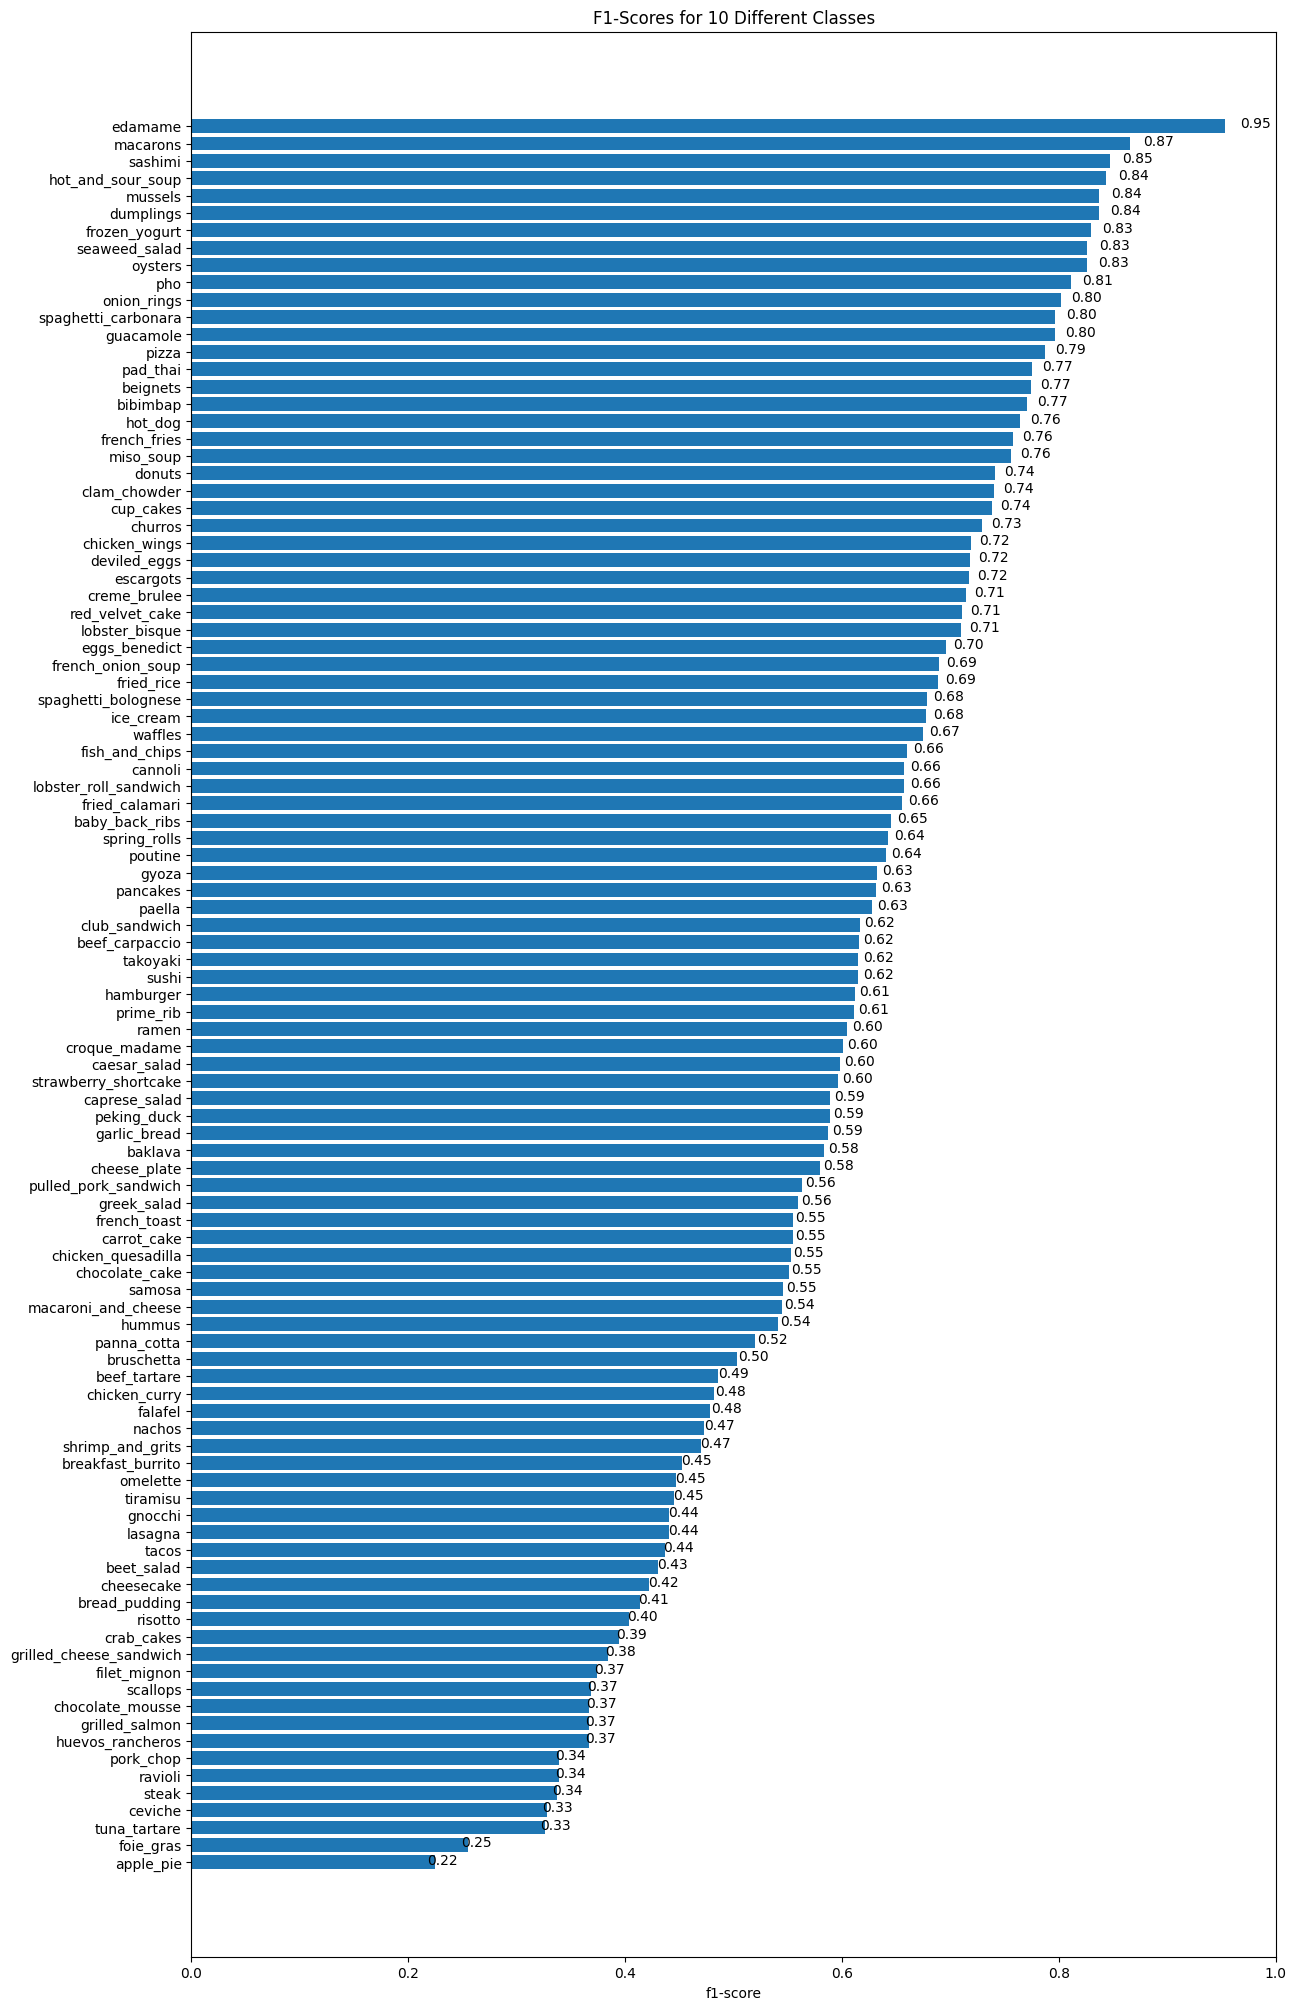

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis();

def autolabel(rects):
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.2,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    return img/255.
  else:
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


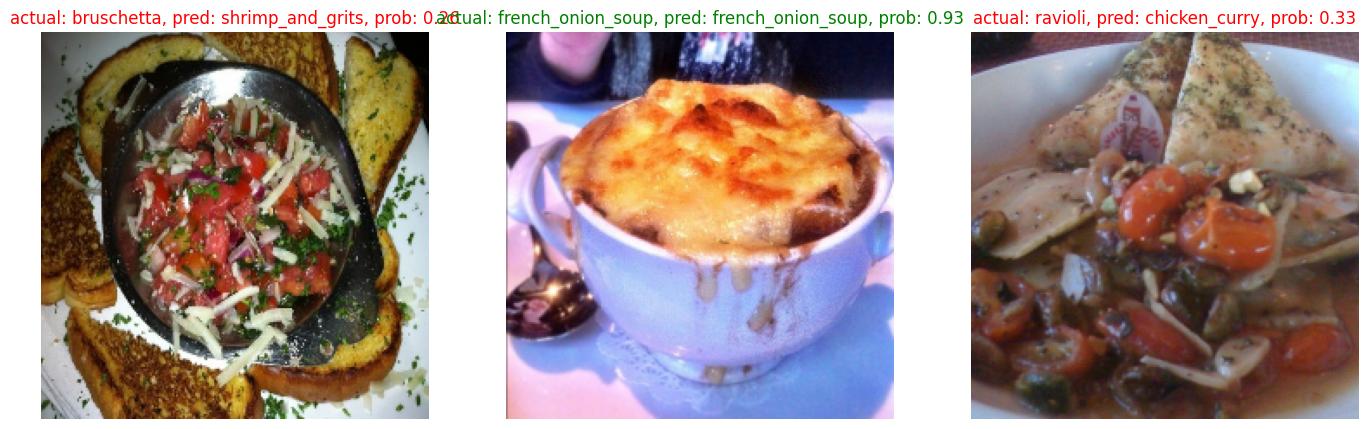

In [ ]:
import os
import random

plt.figure(figsize = (17, 10))
for i in range(3):
  #Choose a random image a random classs
  class_name = random.choice(class_names)
  filenime = random.choice(os.listdir(test_dir + '/' + class_name))
  filepath = test_dir + class_name + '/' +filenime


  #Load the image and make predictions
  img  = load_and_prep_image(filepath, scale = False)
  pred_prob = model_0.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[pred_prob.argmax()]

  #Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255)
  if class_name == pred_class:
    title_color = 'g'
  else:
    title_color = 'r'
  plt.title(f'actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}', c=title_color)
  plt.axis(False)



#Now let's look for biggest errors

In [ ]:
filepaths = []
for filepath in test_data.list_files('101_food_classes_10_percent/test/*/*.jpg',
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [ ]:
pred_df = pd.DataFrame({'img_path': filepaths,
                        'y_true': y_labels,
                        'y_predict': pred_classes,
                        'pred_conf': pred_probs.max(axis = 1),
                        'y_true_classname': [class_names[i] for i in y_labels],
                        'y_pred_classname': [class_names[i] for i in pred_classes]})
pred_df.head()

img_path  y_true  y_predict  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0         85   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0          0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0         28   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0          0   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0          8   

   pred_conf y_true_classname y_pred_classname  
0   0.307203        apple_pie           samosa  
1   0.444151        apple_pie        apple_pie  
2   0.191786        apple_pie    croque_madame  
3   0.404468        apple_pie        apple_pie  
4   0.601319        apple_pie    bread_pudding

In [ ]:
pred_df['inequal'] = (pred_df['y_true_classname'] != pred_df['y_pred_classname'])

In [ ]:
inequal_table = pred_df[pred_df['inequal']==True]
inequal_table.sort_values(by='pred_conf', ascending=False, inplace=True)
inequal_table

<ipython-input-122-b429bb0c33ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inequal_table.sort_values(by='pred_conf', ascending=False, inplace=True)


img_path  y_true  y_predict  \
14482  b'101_food_classes_10_percent/test/hummus/8476...      57         51   
23797  b'101_food_classes_10_percent/test/sushi/16593...      95         86   
18001  b'101_food_classes_10_percent/test/pancakes/10...      72         67   
5114   b'101_food_classes_10_percent/test/chicken_win...      20         38   
18541  b'101_food_classes_10_percent/test/peking_duck...      74         85   
...                                                  ...     ...        ...   
4134   b'101_food_classes_10_percent/test/cheese_plat...      16          8   
23799  b'101_food_classes_10_percent/test/sushi/16771...      95          7   
10807  b'101_food_classes_10_percent/test/fried_calam...      43         34   
4748   b'101_food_classes_10_percent/test/chicken_cur...      18         25   
24101  b'101_food_classes_10_percent/test/tacos/25658...      96         50   

       pred_conf y_true_classname y_pred_classname  inequal  
14482   0.984886           hummus        guacamole     True  
23797   0.983981            sushi          sashimi     True  
18001   0.981677         pancakes         omelette     True  
5114    0.980971    chicken_wings   fish_and_chips     True  
18541   0.979975      peking_duck           samosa     True  
...          ...              ...              ...      ...  
4134    0.072582     cheese_plate    bread_pudding     True  
23799   0.072367            sushi         bibimbap     True  
10807   0.070551   fried_calamari    eggs_benedict     True  
4748    0.069225    chicken_curry    club_sandwich     True  
24101   0.068464            tacos   grilled_salmon     True  

[10000 rows x 7 columns]

This is obivoust that our model makes errors, where meals look like each other

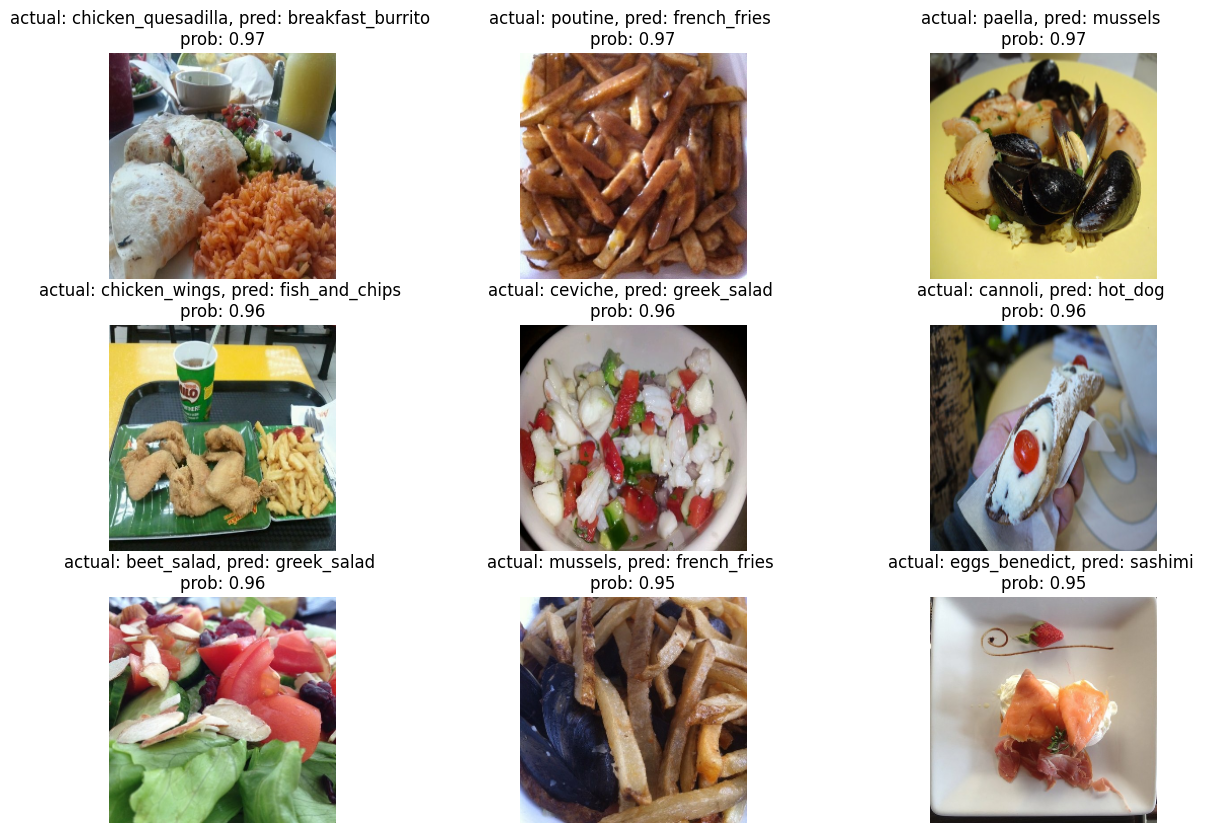

In [ ]:
images_to_view = 9
start_index=10    # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(inequal_table[start_index : start_index + images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row      # only interested ina few parameters of each row
  plt.imshow(img)
  plt.title(f'actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}')
  plt.axis(False)